# 单因素多因素回归

指定数据，进行单因素、多因素回归算法，进行特征筛选。

```python
def variable_analysis(data: pd.DataFrame, features: Union[str, List[str]] = None, label_column: str = 'label',
                      need_norm: Union[bool, List[bool]] = False, alpha=0.1, method='uni'):
    """
    进行单因素或者多因素分析，请确保所有的分析特征都是数值类型的。
    Args:
        data: 数据
        features: 需要分析的特征，默认除了ID和label_column列，其他的特征都进行分析。
        label_column: 目标列
        need_norm: 是否标准化所有分析的数据, 默认为False
        alpha: CI alpha, alpha/2 %
        method: 单因素回归分析还是多因素回归分析，uni 单因素回归，multi 多因素回归，默认单因素

    Returns:

    """
 ```
 
 ### 注意特征名称不要有“-”，全部用下划线“_”代替。

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 替换你自己的数据目录
my_dir = "label.csv" 
label_column = 'label' 
data = pd.read_csv(my_dir)
feature_column = ['Sex', 'Age', 'zhuiti', 'tizhong', 'shengao', 'BMI', 'Tvalue','L3_CTvalue','musleCT','yaodaji','shujiji']
mapping_columns_settings=['Sex','zhuiti',]
data

,ID,label,Sex,Age,duration(M),zhuiti,tizhong,shengao,BMI,Tvalue,L3_CTvalue,musleCT,yaodaji,shujiji
0,1,1,F,59,11,L1,159,59,23.34,-4.0,58.53,48.63,17.56,47.61
1,2,1,F,63,36,L4,162,62,23.62,-3.8,217.11,42.23,11.41,49.06
2,3,1,M,78,13,L1,170,74,25.61,-3.2,192.77,37.42,9.87,51.73
3,4,1,F,92,27,L3,165,65,23.88,-2.6,45.44,57.88,9.07,25.11
4,5,1,F,71,31,T12,156,55,22.60,-3.4,87.97,47.37,11.09,30.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,188,2,F,63,69,L2,159,50,19.78,-2.9,108.63,62.85,13.01,33.95
165,189,2,F,82,68,L2,152,48,20.78,-2.9,72.23,48.39,13.59,31.31
166,190,2,M,73,70,L2,165,43,15.79,-3.2,64.41,59.96,10.09,31.94
167,191,2,F,69,65,T12,159,60,23.73,-3.1,78.25,35.47,9.85,23.91


In [4]:
mapping_columns = mapping_columns_settings or [c for c in data.columns[1:-2] if data[c].dtype == object]
mapping_columns

['Sex', 'zhuiti']

In [5]:
from pixelmed_calc.custom.utils import map2numerical

data, mapping = map2numerical(data, mapping_columns=mapping_columns)
mapping

{'Sex': {'F': 0, 'M': 1},
 'zhuiti': {'L1': 0, 'L2': 1, 'L3': 2, 'L4': 3, 'L5': 4, 'T11': 5, 'T12': 6}}

# 单因素回归
# 如果需要设置哑变量，需要设置亚变量所在的列，以手术类型为例
```python
data
X_dummies = pd.get_dummies(data['手术类型'], prefix='手术类型', drop_first=True)
X_with_dummies = pd.concat([data, X_dummies], axis=1)

# Drop the original "手术类型" column
X_with_dummies = X_with_dummies.drop('手术类型', axis=1)
list(X_with_dummies.columns)[2:]

data替换为X_with_dummies，features指向X_with_dummies中的列。

所有的特征，不进行任何交叉

,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
Sex,1.415e-01,5.000e-03,0.278,1.152,1.005,1.320,0.088
Age,-4.700e-03,-1.000e-02,0.001,0.995,0.990,1.001,0.183
zhuiti,-4.640e-02,-7.700e-02,-0.016,0.955,0.926,0.984,0.012
tizhong,1.170e-02,2.000e-03,0.021,1.012,1.002,1.021,0.045
shengao,-2.000e-04,-6.000e-03,0.005,1.000,0.994,1.005,0.961
BMI,-1.140e-02,-3.000e-02,0.007,0.989,0.970,1.007,0.300
Tvalue,3.712e-01,2.310e-01,0.511,1.449,1.260,1.667,0.000
L3_CTvalue,1.200e-03,7.170e-05,0.002,1.001,1.000,1.002,0.081
musleCT,1.470e-02,9.000e-03,0.021,1.015,1.009,1.021,0.000


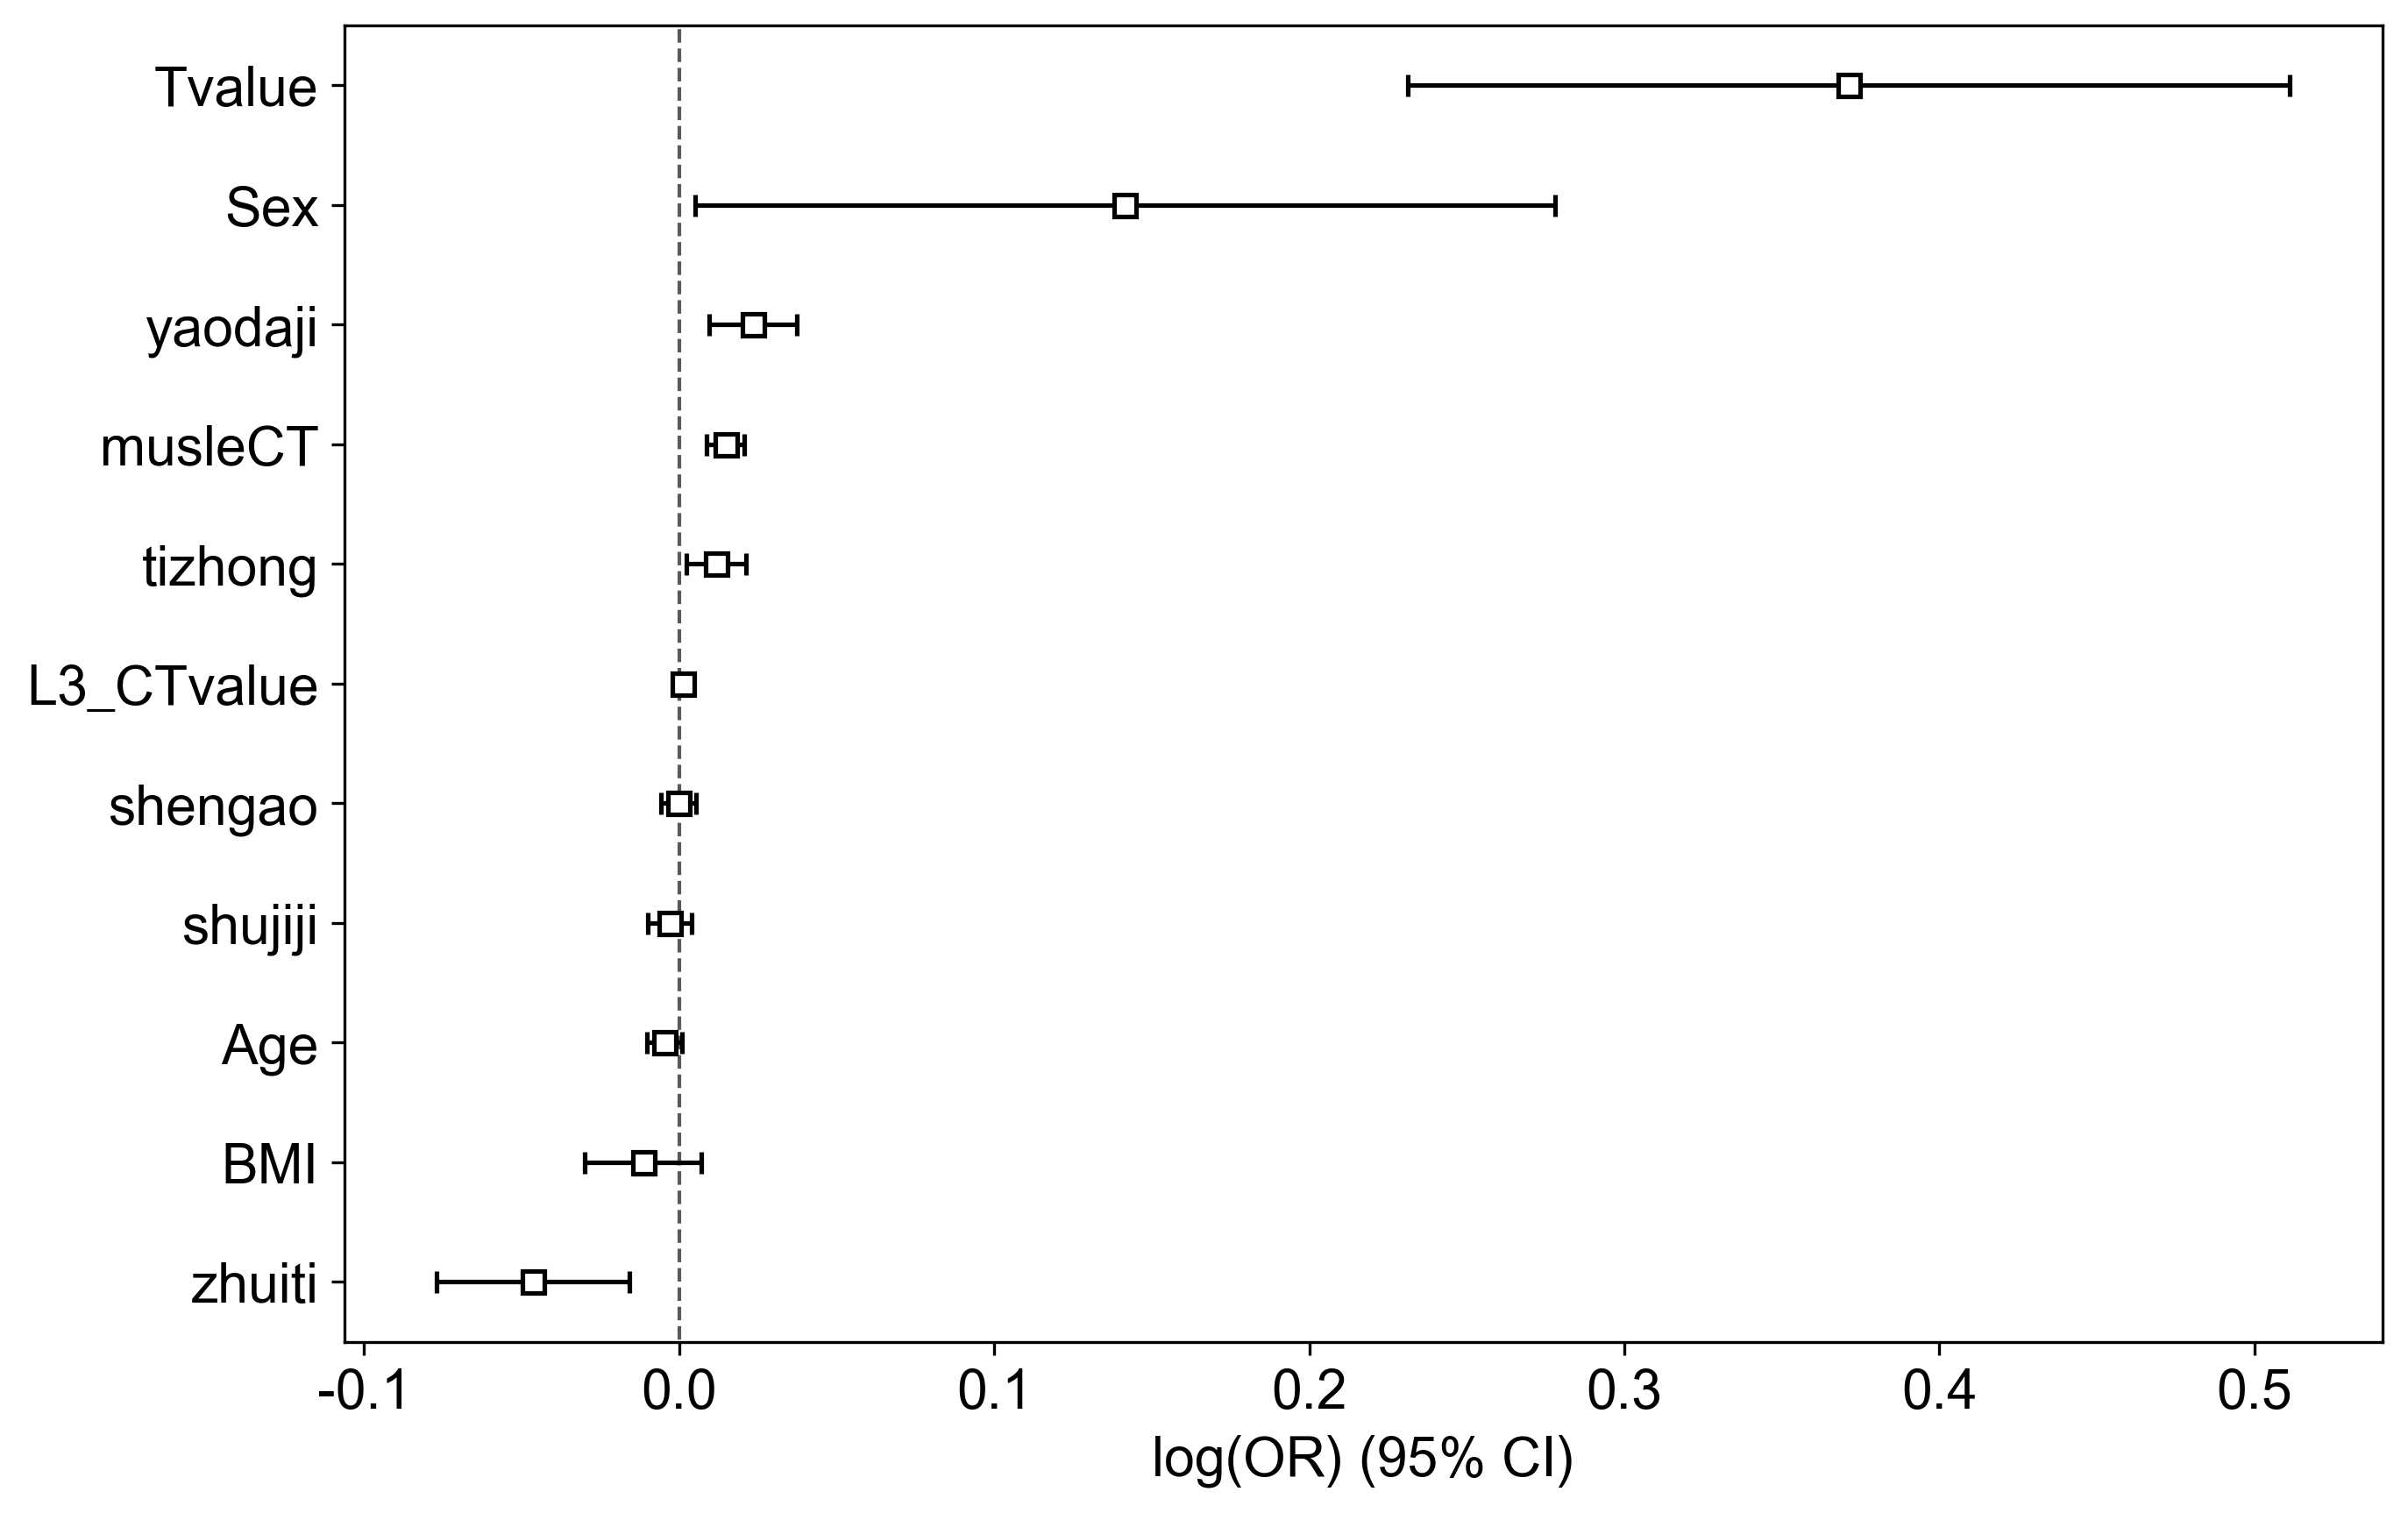

In [6]:
import matplotlib.pyplot as plt
from pixelmed_calc.custom.components.comp1 import variable_analysis, plot_HR
uni = variable_analysis(data, features=feature_column, label_column=label_column, method='uni', need_norm=False)
display(uni)
plot_HR(uni)
plt.show()

# 多因素回归

使用所有的数据进行交叉特征，计算得到。

真实的场景中，先单因素，然后步进式多因素回归，进行筛选。

,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
tizhong,0.077,0.014,0.140,1.080,1.014,1.150,0.045
Tvalue,0.161,0.100,0.221,1.174,1.105,1.247,0.000
musleCT,0.145,0.084,0.206,1.156,1.088,1.229,0.000
shujiji,-0.028,-0.092,0.035,0.972,0.912,1.036,0.463


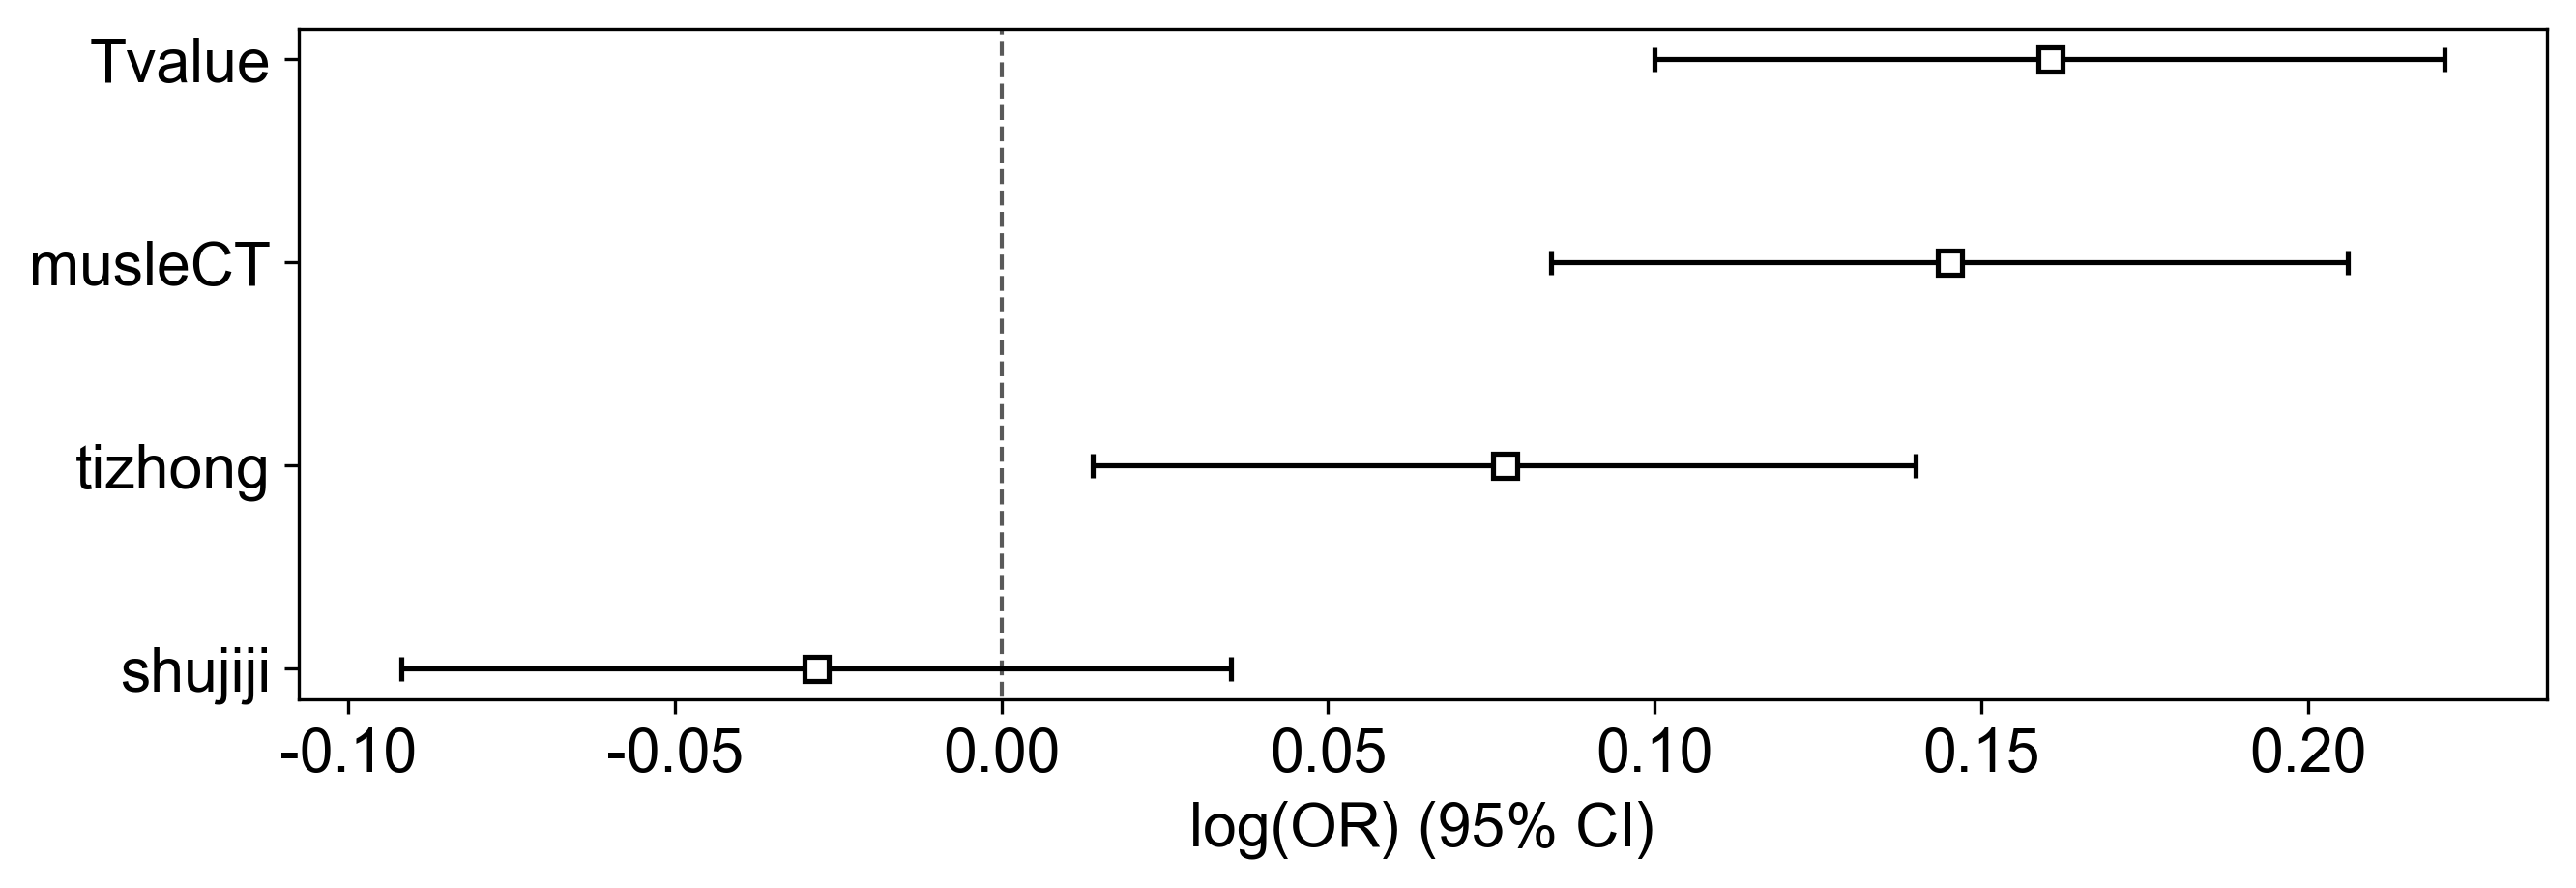

In [7]:
import matplotlib.pyplot as plt
from pixelmed_calc.custom.components.comp1 import variable_analysis, plot_HR
uni = variable_analysis(data, features=['tizhong', 'Tvalue', 'musleCT','shujiji'], label_column=label_column, method='uni', need_norm=True)
display(uni)
plot_HR(uni, figsize=(10, 3))
plt.show()

## 步进式多因素回归：
```python
def uni_multi_variable_analysis(data: pd.DataFrame, features: Union[str, List[str]] = None, label_column: str = 'label',
                                need_norm: Union[bool, List[bool]] = False, alpha=0.1,
                                p_value4multi: float = 0.05, save_dir: Union[str] = None, prefix: str = '',
                                **kwargs):
    """
    单因素，步进多因素分析，使用p_value4multi参数指定多因素分析的阈值
    Args:
        data: 数据
        features: 需要分析的特征，默认除了ID和label_column列，其他的特征都进行分析。
        label_column: 目标列
        need_norm: 是否标准化所有分析的数据, 默认为False
        alpha: CI alpha, alpha/2 %；默认为0.1即95% CI
        p_value4multi: 参数指定多因素分析的阈值，默认为0.05
        save_dir: 保存位置
        prefix: 前缀
        **kwargs:

    Returns:

```

,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
Sex,0.142,0.005,0.278,1.152,1.005,1.320,0.088
Age,-0.005,-0.010,0.001,0.995,0.990,1.001,0.183
zhuiti,-0.046,-0.077,-0.016,0.955,0.926,0.984,0.012
tizhong,0.012,0.002,0.021,1.012,1.002,1.021,0.045
shengao,-0.000,-0.006,0.005,1.000,0.994,1.005,0.961
BMI,-0.011,-0.030,0.007,0.989,0.970,1.007,0.300
Tvalue,0.371,0.231,0.511,1.449,1.260,1.667,0.000
L3_CTvalue,0.001,0.000,0.002,1.001,1.000,1.002,0.081
musleCT,0.015,0.009,0.021,1.015,1.009,1.021,0.000


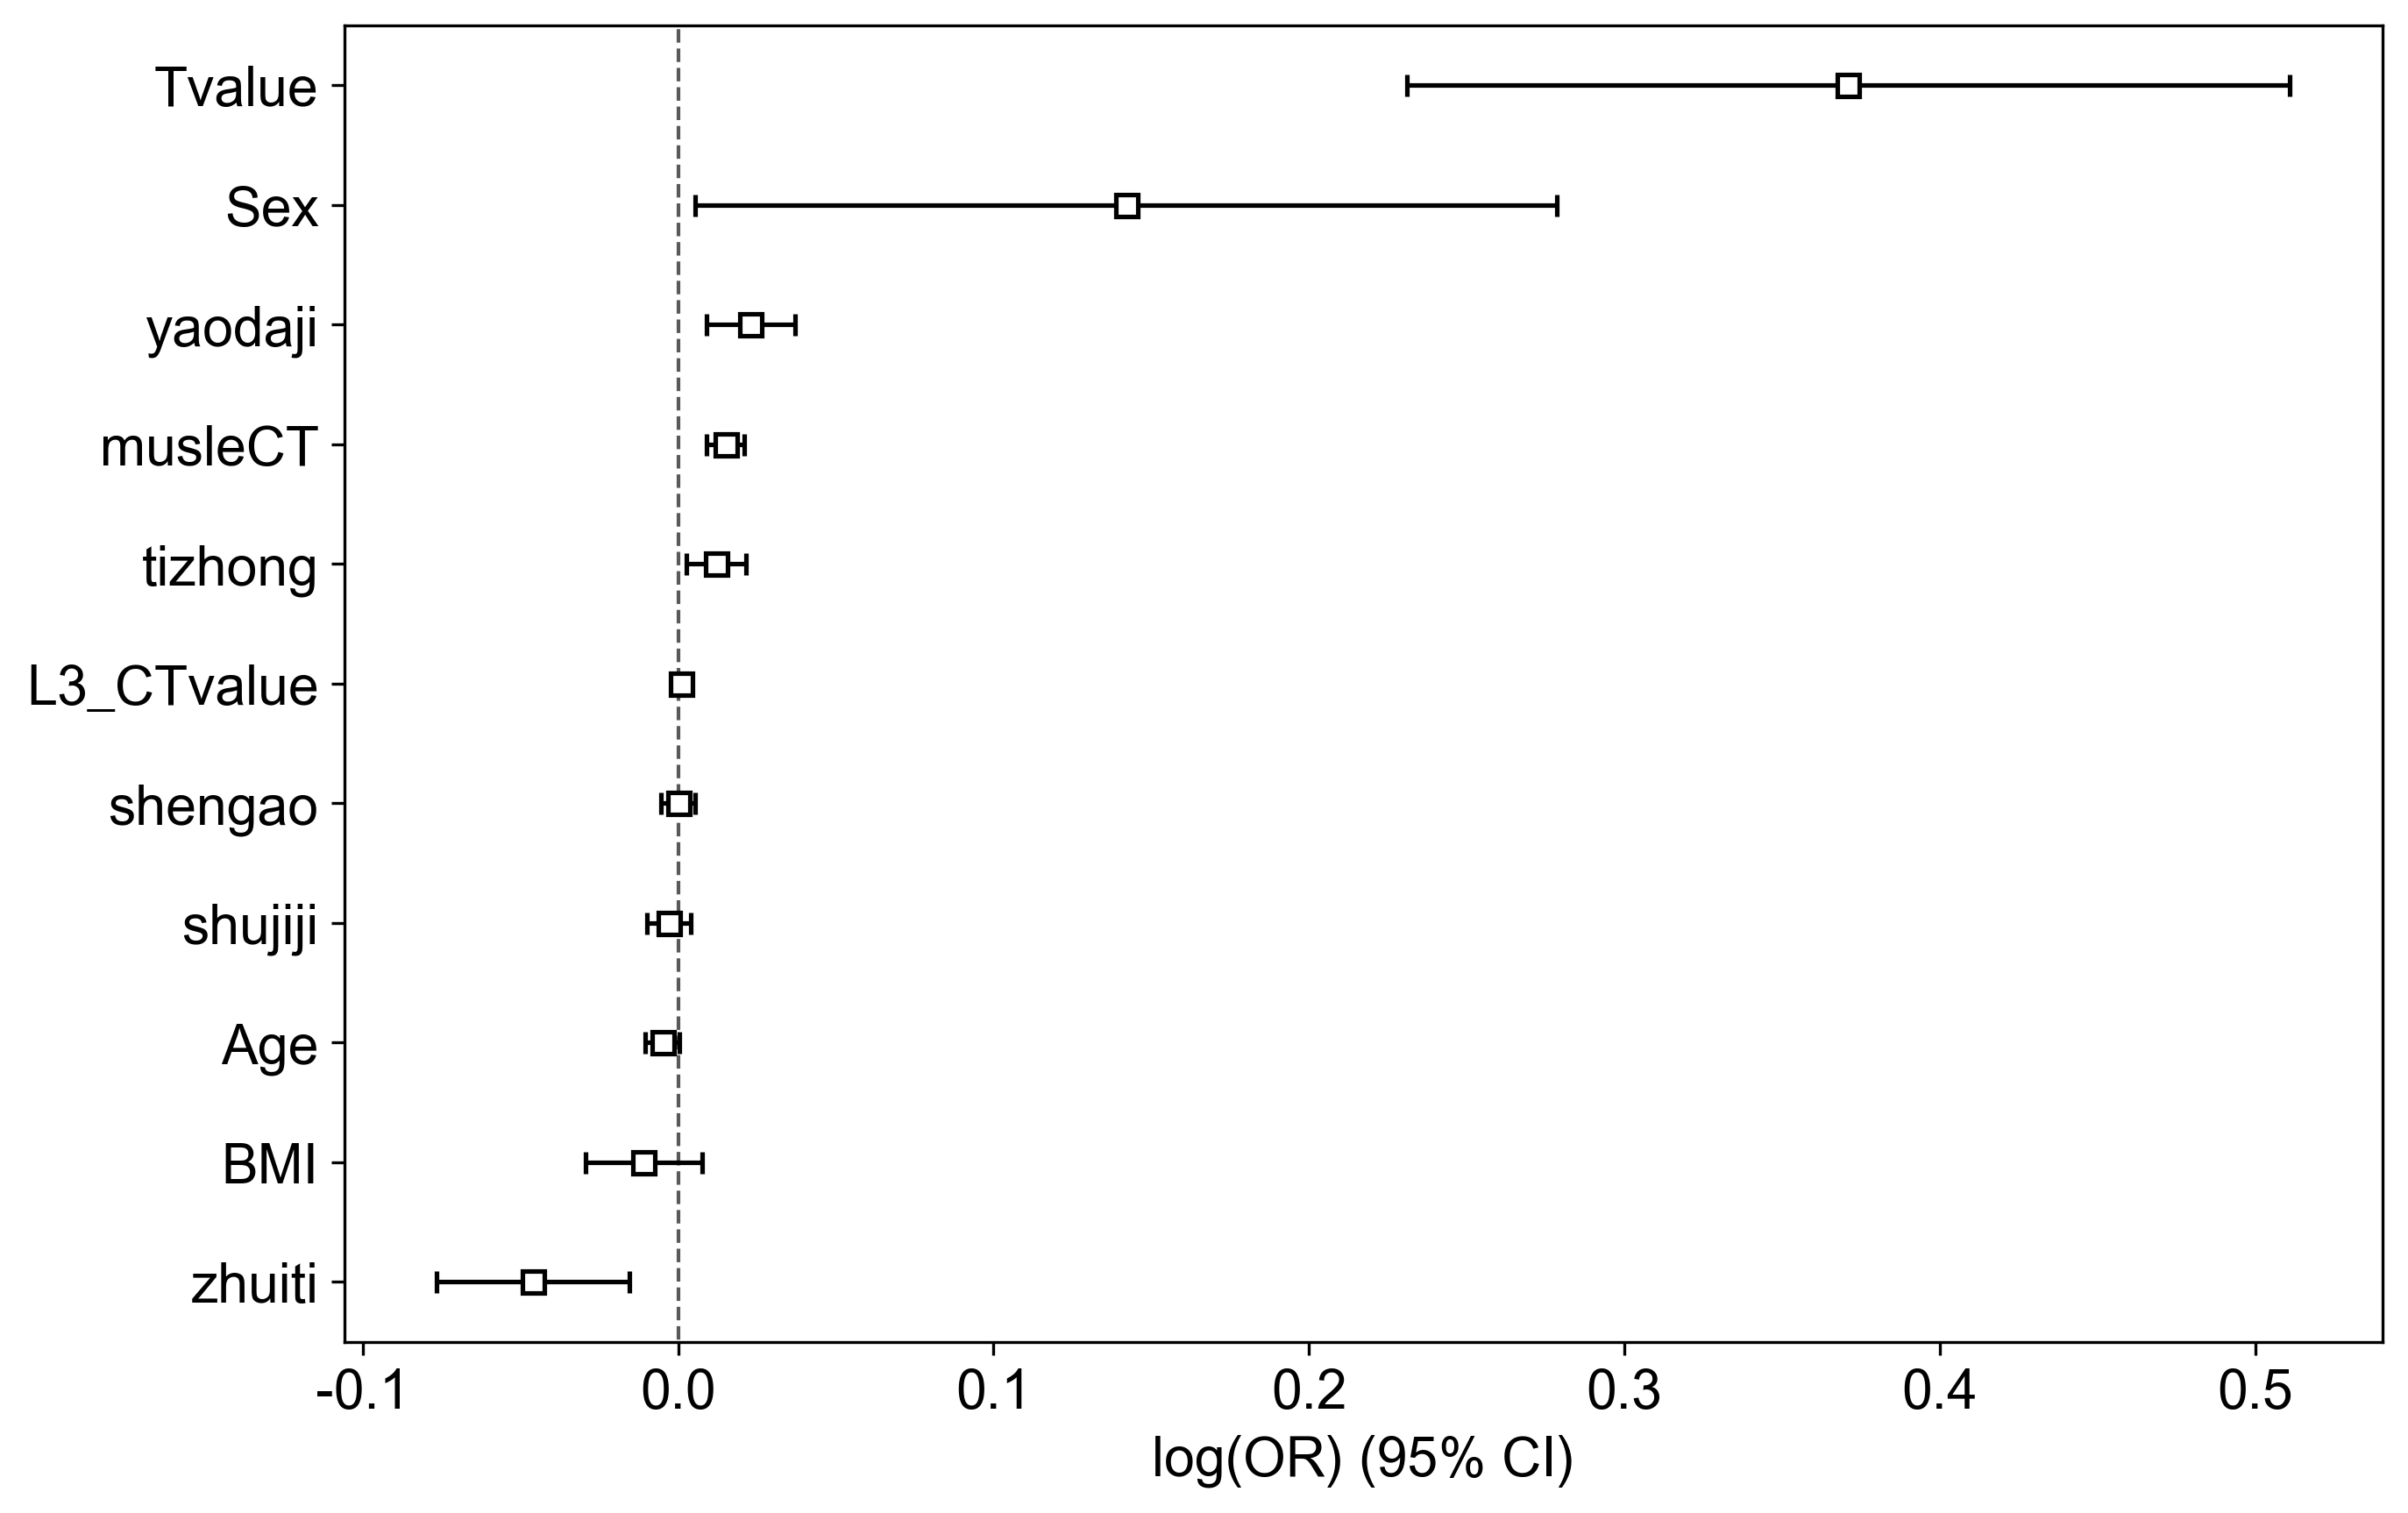

,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
zhuiti,-0.044,-0.072,-0.015,0.957,0.931,0.985,0.012
tizhong,0.001,-0.010,0.011,1.001,0.990,1.011,0.896
musleCT,0.010,0.003,0.016,1.010,1.003,1.016,0.013
yaodaji,0.009,-0.006,0.025,1.009,0.994,1.025,0.319
Tvalue,0.274,0.126,0.422,1.315,1.134,1.525,0.003


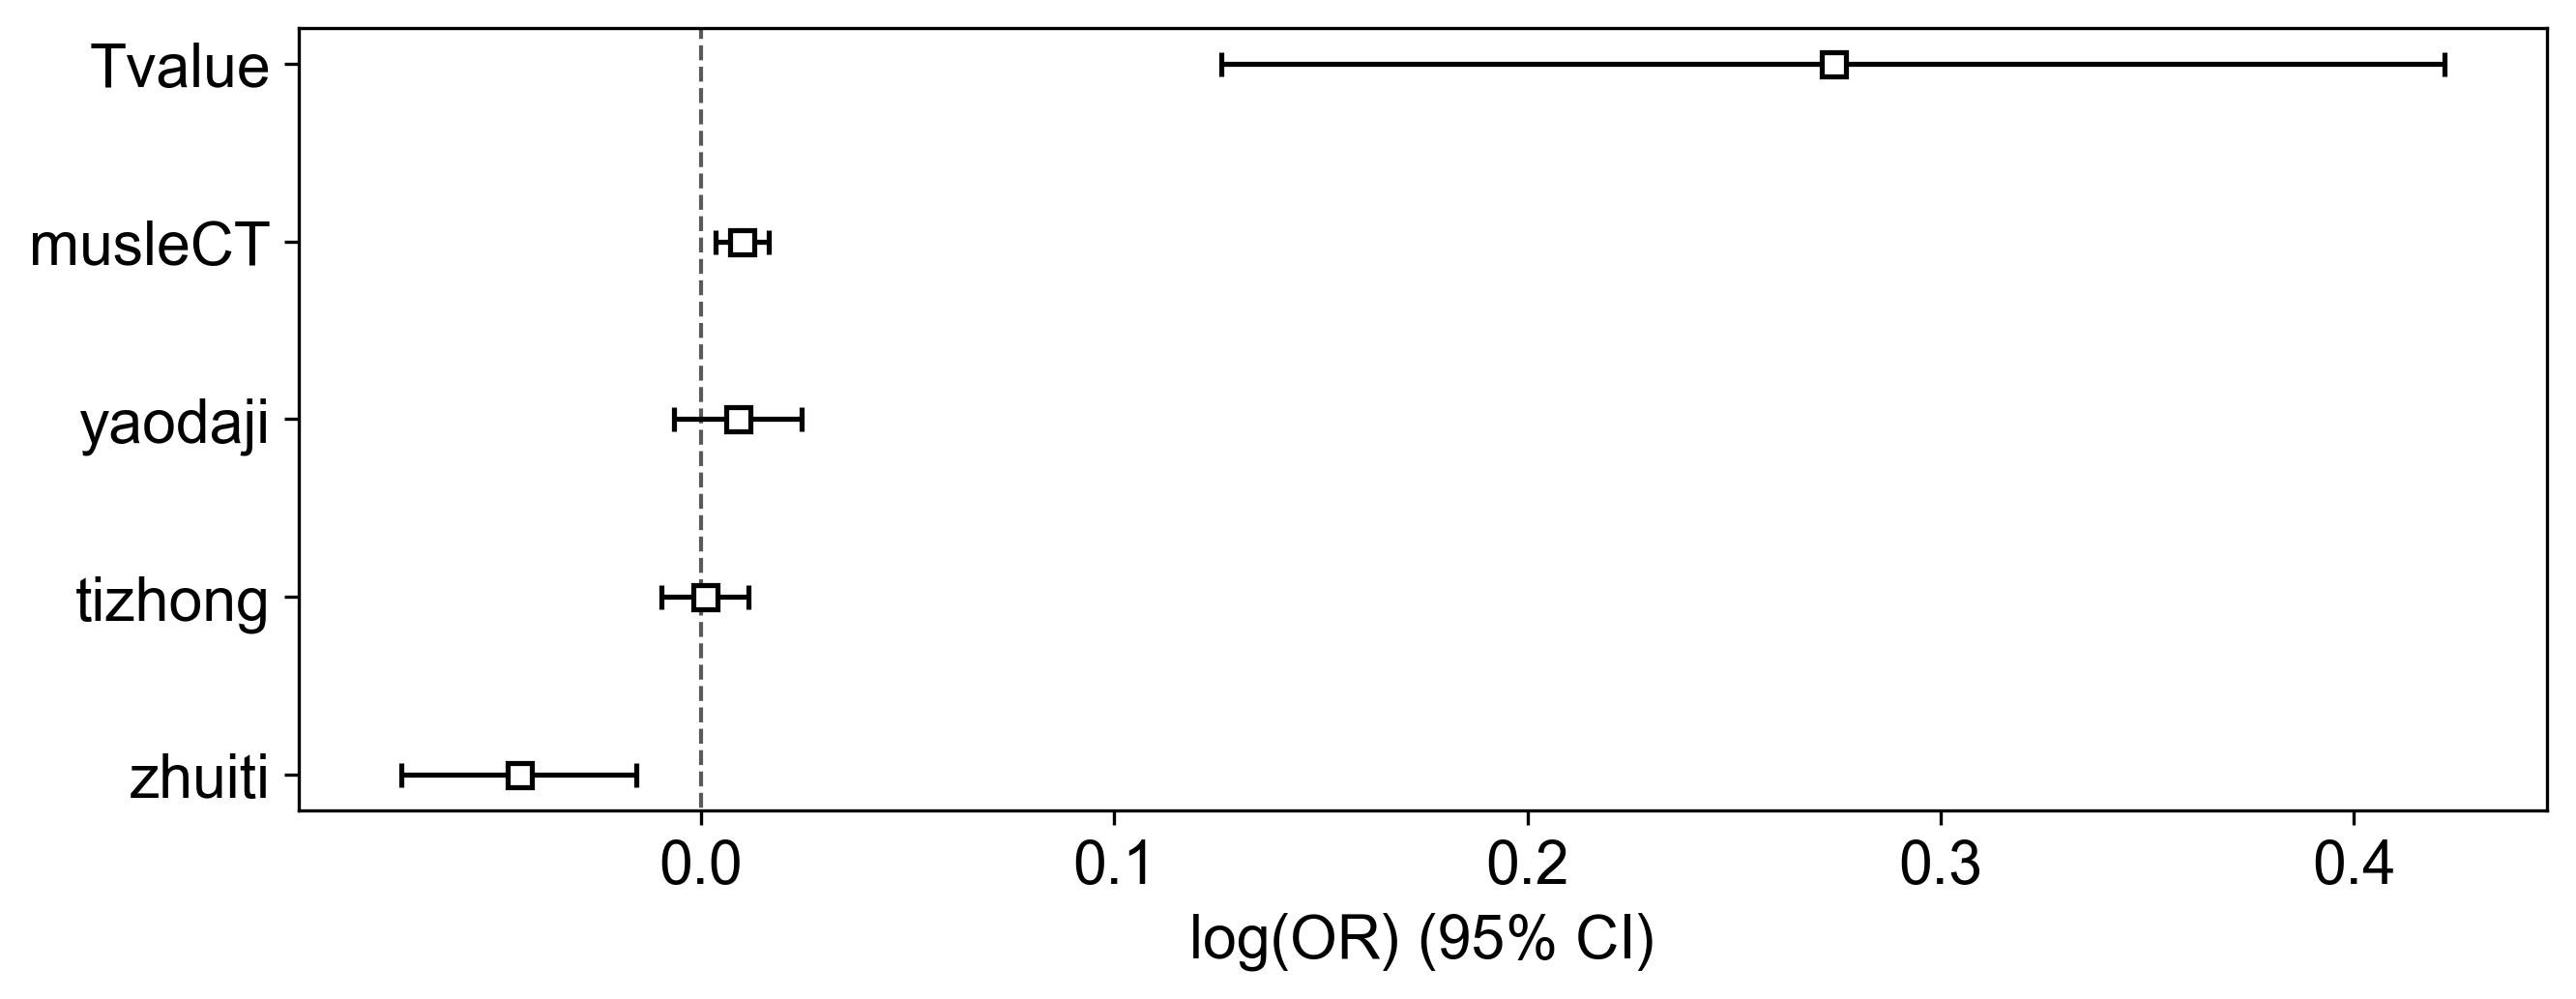

In [13]:
import matplotlib.pyplot as plt
from pixelmed_calc.custom.components.comp1 import uni_multi_variable_analysis, plot_HR
muluni = uni_multi_variable_analysis(data, features=feature_column, label_column=label_column, need_norm=False)
